In [2]:
import pandas as pd
import numpy as np
import sklearn

import seaborn as sns
import matplotlib.pyplot as plt

from collections import defaultdict

In [3]:
path = r"C:\Users\siddh\Desktop\MSA\Acads\ISyE 6414\Project"
df = pd.read_csv(path+r"\training_sample.csv")
df_test = pd.read_csv(path+r"\testing_sample.csv")

In [4]:
df = df.iloc[:, 1:]
df.head()

,basket_icon_click,basket_add_list,basket_add_detail,sort_by,image_picker,account_page_click,promo_banner_click,detail_wishlist_add,list_size_dropdown,closed_minibasket_click,...,saw_sizecharts,saw_delivery,saw_account_upgrade,saw_homepage,device_mobile,device_computer,device_tablet,returning_user,loc_uk,ordered
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,1,0
4,0,1,0,1,0,0,0,0,1,0,...,0,0,0,1,0,0,1,0,1,1


In [5]:
X_0 = df.loc[df['ordered'] == 0]
X_0['ordered'].value_counts()

X_1 = df.loc[df['ordered'] == 1]
X_1['ordered'].value_counts()

1    19093
Name: ordered, dtype: int64

In [6]:
X_sample = X_0.sample(frac = 0.05 , random_state=None)
X_new = X_1.append(X_sample , ignore_index=True)
X_new['ordered'].value_counts()

0    21815
1    19093
Name: ordered, dtype: int64

In [7]:
def create_test_data(df , selected_cols):
    X_1 = df.loc[df['ordered'] == 1]
    X_0 = df.loc[df['ordered'] == 0]
   
    # Select X1 test sample
    #test_indices = np.random.choice(X_1.index, 5000, replace=False , seed = 123)
    X_1_test_sample = X_1.sample(5000 , random_state = 123)
    test_indices = X_1_test_sample.index
    #X_1_test_sample = X_1.iloc[test_indices]
    X_1_train_sample = X_1.drop(test_indices)
   
    # Select X0 train sample
    #test_indices = np.random.choice(X_0.index, 7000, replace=False , seed = 123)
    X_0_test_sample = X_0.sample(15000, random_state = 123)
    test_indices = X_0_test_sample.index
    #X_0_test_sample = X_0_new.iloc[test_indices]
   
    X_0_new = X_0.drop(test_indices)
   
    #train_indices = np.random.choice(X_0_new.index, 15000, replace=False)
    X_0_train_sample = X_0.sample(45000)
   
    df_train = X_1_train_sample.append(X_0_train_sample , ignore_index=True)
    df_test = X_1_test_sample.append(X_0_test_sample , ignore_index=True)
   
    X_train = df_train[selected_cols]
    X_test = df_test[selected_cols]
    y_train = df_train['ordered']
    y_test = df_test['ordered']
   
    return X_train , X_test , y_train , y_test

In [8]:
select_cols = ['basket_icon_click', 'basket_add_list', 'basket_add_detail', 'sort_by', 'image_picker', 'account_page_click',
               'promo_banner_click', 'detail_wishlist_add', 'list_size_dropdown', 'closed_minibasket_click', 
               'checked_returns_detail', 'saw_sizecharts', 'saw_delivery', 'saw_account_upgrade', 'saw_homepage',  
               'device_computer', 'device_tablet', 'returning_user']

In [9]:
X_train , X_test , y_train , y_test = create_test_data(df, select_cols)

In [10]:
N, D = df.shape
print(N, D)

X = X_new.loc[:, select_cols]
y = X_new.iloc[:, -1]

455401 24


In [11]:
y.value_counts()

0    21815
1    19093
Name: ordered, dtype: int64

In [12]:
X.describe()

,basket_icon_click,basket_add_list,basket_add_detail,sort_by,image_picker,account_page_click,promo_banner_click,detail_wishlist_add,list_size_dropdown,closed_minibasket_click,checked_returns_detail,saw_sizecharts,saw_delivery,saw_account_upgrade,saw_homepage,device_computer,device_tablet,returning_user
count,40908.000000,40908.000000,40908.000000,40908.000000,40908.000000,40908.000000,40908.000000,40908.000000,40908.000000,40908.000000,40908.000000,40908.000000,40908.000000,40908.000000,40908.000000,40908.000000,40908.000000,40908.000000
mean,0.370783,0.234868,0.390217,0.058693,0.051384,0.010805,0.031143,0.006356,0.368314,0.055710,0.021609,0.000733,0.010414,0.002958,0.439938,0.237729,0.139141,0.597952
std,0.483020,0.423922,0.487805,0.235051,0.220782,0.103384,0.173706,0.079470,0.482353,0.229364,0.145406,0.027071,0.101516,0.054306,0.496386,0.425697,0.346098,0.490318
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:>

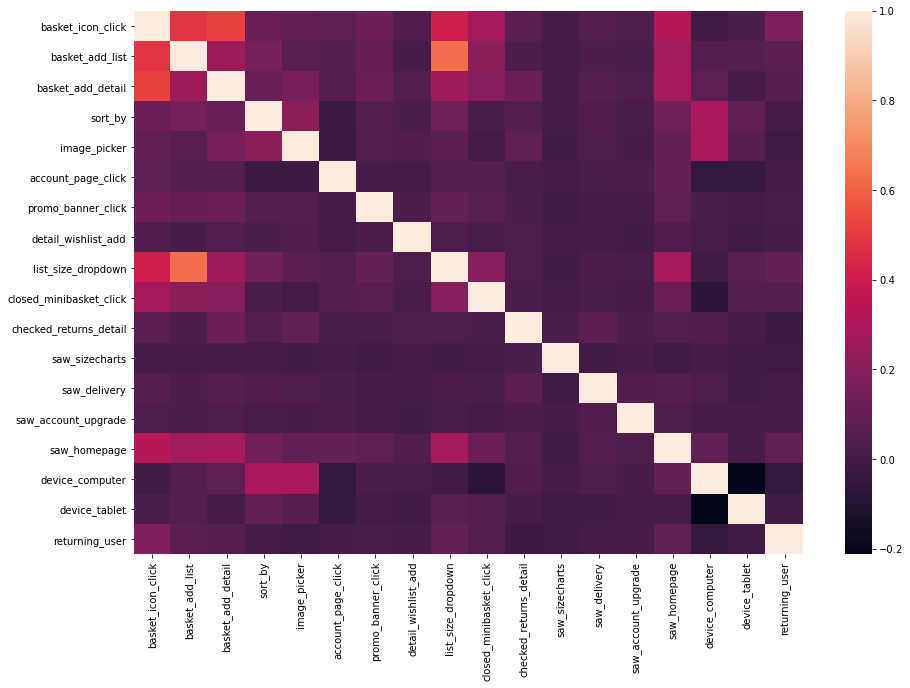

In [13]:
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(X.corr(), ax=ax)

In [14]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123, stratify=y)

In [15]:
from sklearn import linear_model
clf = linear_model.Lasso(alpha=0.1).fit(X_train, y_train)

print(X_train.columns)
clf.coef_

Index(['basket_icon_click', 'basket_add_list', 'basket_add_detail', 'sort_by',
       'image_picker', 'account_page_click', 'promo_banner_click',
       'detail_wishlist_add', 'list_size_dropdown', 'closed_minibasket_click',
       'checked_returns_detail', 'saw_sizecharts', 'saw_delivery',
       'saw_account_upgrade', 'saw_homepage', 'device_computer',
       'device_tablet', 'returning_user'],
      dtype='object')


array([0.03712766, 0.        , 0.08661087, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        ])

In [16]:
from sklearn.metrics import recall_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.metrics import f1_score

In [17]:
y_pred = []
accuracy = []
precision = []
recall = []
from sklearn.naive_bayes import GaussianNB

for i in range(10):
    X_train , X_test , y_train , y_test = create_test_data(df, select_cols)
    
    gnb = GaussianNB()
    y_pred_i = gnb.fit(X_train, y_train).predict(X_test)
    y_pred.append(y_pred_i)
    
    accuracy.append(accuracy_score(y_test, y_pred_i))
    precision.append(precision_score(y_test, y_pred_i, average='macro'))
    recall.append(recall_score(y_test, y_pred_i, average='macro'))

print('============ Gaussian Naive Bayes ============')
print('Mean Accuracy Score: {}, with std. deviation {}'.format(np.mean(accuracy), np.std(accuracy)))
print('Mean Precision Score: {}, with std. deviation {}'.format(np.mean(precision), np.std(precision)))
print('Mean Recall Score: {}, with std. deviation {}'.format(np.mean(recall), np.std(recall)))

============ Gaussian Naive Bayes ============
Mean Accuracy Score: 0.8495649999999999, with std. deviation 0.0012087286709596932
Mean Precision Score: 0.7989668241117525, with std. deviation 0.0016985341548880495
Mean Recall Score: 0.8018700000000001, with std. deviation 0.001132396671764063


In [106]:
# gnb = GaussianNB()
# y_pred = gnb.fit(X_train, y_train).predict(X_test)

# print("Recall = {}".format(recall_score(y_test, y_pred, average='macro')))
# print("Precision = {}".format(precision_score(y_test, y_pred, average='macro')))
# print("F1-Score = {}".format(f1_score(y_test, y_pred, average='macro')))

In [133]:
y_pred = []
accuracy = []
precision = []
recall = []
from sklearn.linear_model import LogisticRegression

for i in range(10):
    X_train , X_test , y_train , y_test = create_test_data(df, select_cols)

    clf = LogisticRegression().fit(X_train, y_train)
    y_pred_i = clf.predict(X_test)
    
    y_pred.append(y_pred_i)
    
    accuracy.append(accuracy_score(y_test, y_pred_i))
    precision.append(precision_score(y_test, y_pred_i, average='macro'))
    recall.append(recall_score(y_test, y_pred_i, average='macro'))

print('============ Gaussian Naive Bayes ============')
print('Mean Accuracy Score: {}, with std. deviation {}'.format(np.mean(accuracy), np.std(accuracy)))
print('Mean Precision Score: {}, with std. deviation {}'.format(np.mean(precision), np.std(precision)))
print('Mean Recall Score: {}, with std. deviation {}'.format(np.mean(recall), np.std(recall)))

============ Gaussian Naive Bayes ============
Mean Accuracy Score: 0.884555, with std. deviation 0.0013497129324415533
Mean Precision Score: 0.854619246409938, with std. deviation 0.0008596032690675826
Mean Recall Score: 0.8287700000000001, with std. deviation 0.004419086129758306


In [134]:
y_pred = []
accuracy = []
precision = []
recall = []
from sklearn.ensemble import RandomForestClassifier

for i in range(10):
    X_train , X_test , y_train , y_test = create_test_data(df, select_cols)

    clf = RandomForestClassifier(max_depth=15, random_state=0)
    clf.fit(X_train, y_train)
    y_pred_i = clf.predict(X_test)
    
    y_pred.append(y_pred_i)
    accuracy.append(accuracy_score(y_test, y_pred_i))
    precision.append(precision_score(y_test, y_pred_i, average='macro'))
    recall.append(recall_score(y_test, y_pred_i, average='macro'))

print('============ Gaussian Naive Bayes ============')
print('Mean Accuracy Score: {}, with std. deviation {}'.format(np.mean(accuracy), np.std(accuracy)))
print('Mean Precision Score: {}, with std. deviation {}'.format(np.mean(precision), np.std(precision)))
print('Mean Recall Score: {}, with std. deviation {}'.format(np.mean(recall), np.std(recall)))

============ Gaussian Naive Bayes ============
Mean Accuracy Score: 0.8990599999999999, with std. deviation 0.0008377947242612608
Mean Precision Score: 0.8572204131119268, with std. deviation 0.0010989387311969709
Mean Recall Score: 0.8913266666666667, with std. deviation 0.003306720429670453


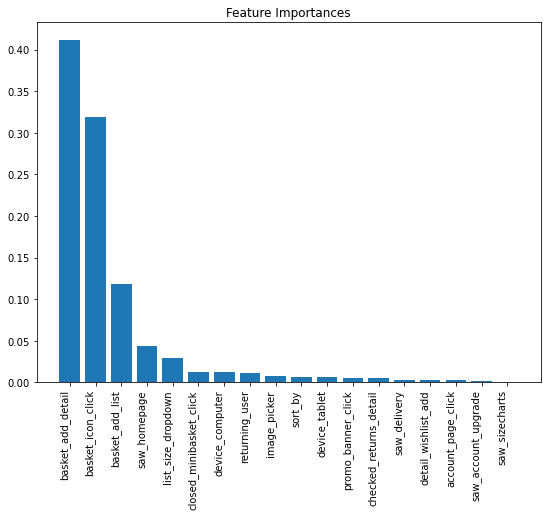

In [127]:
feats = list(zip(X_train.columns, clf.feature_importances_))
sorted_feats = sorted(feats, key=lambda x: x[1], reverse=True)
sorted_feats

x = list(zip(*sorted_feats))[0]
y = list(zip(*sorted_feats))[1]


fig = plt.figure(figsize=(7,5))
ax = fig.add_axes([0,0,1,1])

ax.bar(x, y)

plt.xticks(rotation=90, ha='right')
plt.title('Feature Importances')
plt.show()

In [46]:
from sklearn.svm import SVC
clf = SVC(gamma='auto')
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print("Recall = {}".format(recall_score(y_test, y_pred, average='macro')))
print("Precision = {}".format(precision_score(y_test, y_pred, average='macro')))
print("F1-Score = {}".format(f1_score(y_test, y_pred, average='macro')))

Recall = 0.912303546355058
Precision = 0.9110513939993876
F1-Score = 0.9092123345178478


In [19]:
y_pred = []
accuracy = []
precision = []
recall = []
from xgboost import XGBClassifier

for i in range(10):
    X_train , X_test , y_train , y_test = create_test_data(df, select_cols)
    clf = XGBClassifier(n_estimators=10)
    clf.fit(X_train, y_train)

    y_pred_i = clf.predict(X_test)
    y_pred.append(y_pred_i)

    accuracy.append(accuracy_score(y_test, y_pred_i))
    precision.append(precision_score(y_test, y_pred_i, average='macro'))
    recall.append(recall_score(y_test, y_pred_i, average='macro'))

print('============ Gaussian Naive Bayes ============')
print('Mean Accuracy Score: {}, with std. deviation {}'.format(np.mean(accuracy), np.std(accuracy)))
print('Mean Precision Score: {}, with std. deviation {}'.format(np.mean(precision), np.std(precision)))
print('Mean Recall Score: {}, with std. deviation {}'.format(np.mean(recall), np.std(recall)))

C:\Users\siddh\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:31:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\siddh\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:31:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\siddh\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:31:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\siddh\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:31:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\siddh\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:31:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\siddh\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:31:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\siddh\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:32:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\siddh\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:32:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\siddh\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:32:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\siddh\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:32:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
============ Gaussian Naive Bayes ============
Mean Accuracy Score: 0.901605, with std. deviation 0.0004197916149710443
Mean Precision Score: 0.8593751882953361, with std. deviation 0.0006024953242995125
Mean Recall Score: 0.9001833333333332, with std. deviation 0.0034971496329947783


In [20]:
probs = np.array(clf.predict_proba(X_test))[:, 1]
probs = pd.Series(probs)
probs

0        0.693052
1        0.660656
2        0.605978
3        0.484168
4        0.605978
           ...   
19995    0.057693
19996    0.025143
19997    0.023657
19998    0.023657
19999    0.025143
Length: 20000, dtype: float32

In [76]:
result = pd.DataFrame(probs, columns=['prob'])
# result['label'] = ['High' if prob > 0.75 else 'Medium' if (prob > 0.5 and prob <= 0.75) else 'Low' for prob in probs]
result['label'] = ['High' if prob > 0.5 else 'Low' for prob in probs]
result.head(500)

,prob,label
0,0.693052,High
1,0.660656,High
2,0.605978,High
3,0.484168,Low
4,0.605978,High
...,...,...
495,0.746653,High
496,0.886686,High
497,0.055388,Low
498,0.843988,High


In [87]:
signif_cols = ['basket_icon_click', 'basket_add_list', 'basket_add_detail']
X_probs = X_test.merge(result, left_index=True, right_index=True, how='inner')
X_probs.head()

,basket_icon_click,basket_add_list,basket_add_detail,sort_by,image_picker,account_page_click,promo_banner_click,detail_wishlist_add,list_size_dropdown,closed_minibasket_click,checked_returns_detail,saw_sizecharts,saw_delivery,saw_account_upgrade,saw_homepage,device_computer,device_tablet,returning_user,prob,label
0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,1,0,1,0.693052,High
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0.660656,High
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0.605978,High
3,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,1,0.484168,Low
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0.605978,High


In [102]:
X_probs[X_probs.label=='Low'].basket_add_detail.value_counts()/len(X_probs[X_probs.label=='Low'])

0    0.978403
1    0.021597
Name: basket_add_detail, dtype: float64

In [108]:
def func(df, col, label):
    data = df[df.label == label]
    freq = (data[col].value_counts()/len(data)).sort_index()
    return freq

In [109]:
func(X_probs, 'basket_icon_click', 'Low')

0    0.993542
1    0.006458
Name: basket_icon_click, dtype: float64

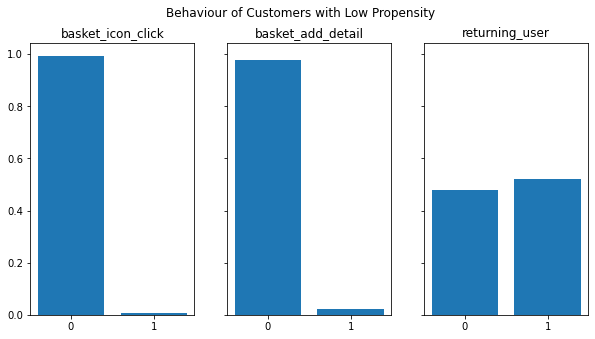

In [136]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10,5), sharey=True)
fig.suptitle('Behaviour of Customers with Low Propensity')
ax1.bar(list(map(str, func(X_probs, 'basket_icon_click', 'Low').index)), func(X_probs, 'basket_icon_click', 'Low'))
ax1.title.set_text('basket_icon_click')
ax2.bar(list(map(str, func(X_probs, 'basket_add_detail', 'Low').index)), func(X_probs, 'basket_add_detail', 'Low'))
ax2.title.set_text('basket_add_detail')
ax3.bar(list(map(str, func(X_probs, 'returning_user', 'Low').index)), func(X_probs, 'returning_user', 'Low'))
ax3.title.set_text('returning_user')

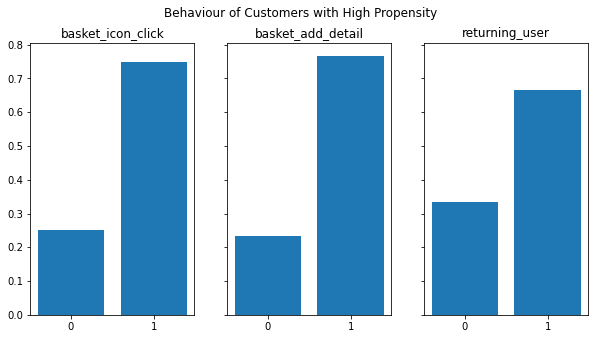

In [137]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10,5), sharey=True)
fig.suptitle('Behaviour of Customers with High Propensity')
ax1.bar(list(map(str, func(X_probs, 'basket_icon_click', 'High').index)), func(X_probs, 'basket_icon_click', 'High'))
ax1.title.set_text('basket_icon_click')
ax2.bar(list(map(str, func(X_probs, 'basket_add_detail', 'High').index)), func(X_probs, 'basket_add_detail', 'High'))
ax2.title.set_text('basket_add_detail')
ax3.bar(list(map(str, func(X_probs, 'returning_user', 'High').index)), func(X_probs, 'returning_user', 'High'))
ax3.title.set_text('returning_user')